In [1]:
# Settings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
# Data Load - Titanic Dataset
path = os.getcwd()
path = '/Users/yunho/projects/Tobigs_2018'
df = pd.read_csv(os.path.join(path, 'titanic.csv'))
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Brief EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Check NaN
df.isnull().sum()
### Age : 177
### Cabin : 687
### Embarked : 2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## To see Dataframe at maximum
pd.set_option('display.max_columns', 50)

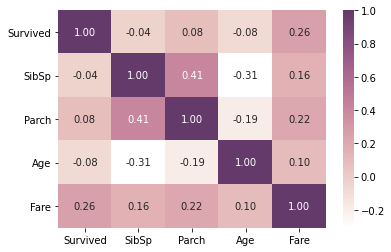

In [6]:
# Feature Analysis(Data Preprocessing) - Continuous Variable
## Correlation Matrix Heatmap
cmap = sns.cubehelix_palette(dark=0.3, light=1, as_cmap=True)
graph = sns.heatmap(df[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt='0.2f', cmap=cmap)
plt.show()


## Fare variable - seems to be significantly related to survived
## Parch and Sibsp - highly correlated.

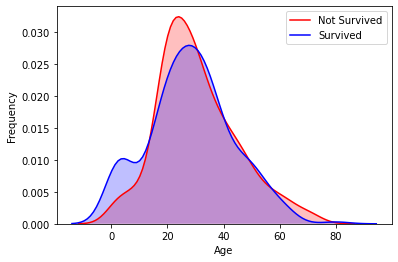

In [7]:
## Age
graph = sns.kdeplot(df['Age'][(df['Survived'] == 0) & (df['Age'].notnull())], color='Red', shade=True)
graph = sns.kdeplot(df['Age'][(df['Survived'] == 1) & (df['Age'].notnull())], ax=graph, color='Blue', shade=True)
graph.set_xlabel('Age')
graph.set_ylabel('Frequency')
graph = graph.legend(['Not Survived', 'Survived'])
plt.show()

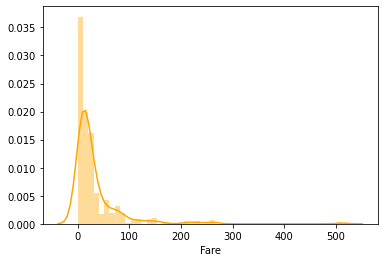

In [8]:
## Fare
graph = sns.distplot(df['Fare'], color='orange')
plt.show()

## Skewed to right
## Log transformation needed

In [9]:
## Log transformation
df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x>0 else 0)

In [10]:
# Feature Analysis(Data Preprocessing) - Categorical Variable
## Sex
df[['Sex', 'Survived']].groupby('Sex').mean()

## prob(female) : 0.74
## prob(male) : 0.18
## prob(female) > prob(male)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
## Embarked
df[df['Embarked'].isnull()==True] # Embarked == NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


In [12]:
### Pclass, Fare, Cabin groupby Embarked
print('Fare')
print()
print(df['Fare'].groupby(df['Embarked']).describe())
print()
print('Pclass')
print()
print(df['Pclass'].groupby(df['Embarked']).describe())
print()
print('Cabin')
print()
print(df['Cabin'].groupby(df['Embarked']).describe())

Fare

          count      mean       std       min       25%       50%       75%  \
Embarked                                                                      
C         168.0  3.437320  1.133573  1.389414  2.617175  3.391147  4.363086   
Q          77.0  2.356715  0.565436  1.909543  2.047693  2.047693  2.740840   
S         644.0  2.811671  0.946189  0.000000  2.085672  2.564949  3.328627   

               max  
Embarked            
C         6.238967  
Q         4.499810  
S         5.572154  

Pclass

          count      mean       std  min  25%  50%  75%  max
Embarked                                                    
C         168.0  1.886905  0.944100  1.0  1.0  1.0  3.0  3.0
Q          77.0  2.909091  0.369274  1.0  3.0  3.0  3.0  3.0
S         644.0  2.350932  0.789402  1.0  2.0  3.0  3.0  3.0

Cabin

         count unique      top freq
Embarked                           
C           69     57      D33    2
Q            4      3      C78    2
S          129     89  B96 

In [13]:
### All things considered, Pclass == 1, Fare == 80 -> 2 Nan would be probably Embarked C
### NaN processing
df['Embarked'].fillna('C', inplace=True)

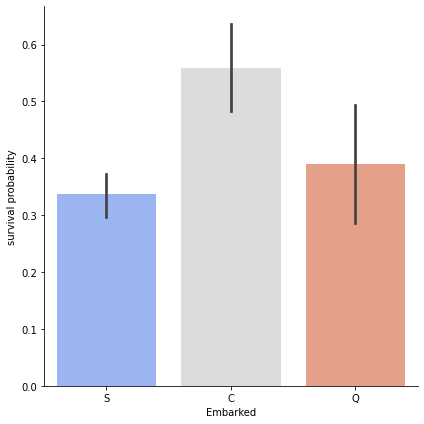

In [14]:
graph = sns.catplot(x='Embarked', y='Survived', data=df, height=6, kind='bar', palette='coolwarm')
graph = graph.set_ylabels('survival probability')
plt.show()

## Embarked C -> high survival probability

In [15]:
# Feature Enigineering(Data Preprocessing)
## Sex
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [16]:
## Embarked
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
df['Embarked'] = df['Embarked'].astype(int)
# df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [17]:
## Name
### Process the words such as 'Mr', 'Miss' in Name
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Sir           1
Countess      1
Capt          1
Lady          1
Mme           1
Don           1
Ms            1
Name: Title, dtype: int64

In [18]:
### Check NaN
df['Title'].isnull().sum()

0

In [19]:
### Mapping Title - Encoding Categorical Variables
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Don', 'Jonkheer', 'Capt', 'Countess', 'Lady', 'Done'], 'etc')
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':1, 'Master':2, 'Mlle':1, 'Ms':1, 'Sir':0, 'Mme':1, 'etc':3}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].astype(int)

In [20]:
## Age
### Estimate NaN values based on the age of people with similar Pclass, Parch and SibSP
### Index of NaN age rows
idx_list = list(df['Age'][df['Age'].isnull()].index)

for i in idx_list:
    age_median = df['Age'].median()
    age_pred = df['Age'][((df['SibSp']==df.iloc[i]['SibSp']) & (df['Parch']==df.iloc[i]['Parch']) & (df['Pclass']==df.iloc[i]['Pclass']))].median()
    
    if not np.isnan(age_pred):
        df['Age'].iloc[i] = age_pred
    else:
        df['Age'].iloc[i] = age_median

/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/yunho/.pyenv/versions/3.7.4/envs/Tobigs_2018-env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

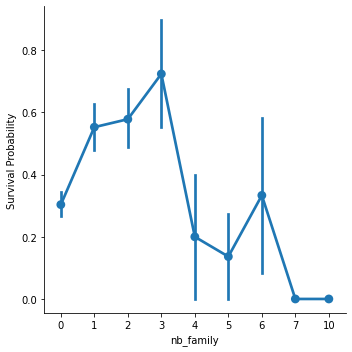

In [23]:
## Merge SibSp and Parch
df['nb_family'] = df['SibSp'] + df['Parch']

graph = sns.catplot(x='nb_family', y='Survived', data=df, kind='point')
graph = graph.set_ylabels('Survival Probability')
plt.show()

In [24]:
## Drop unnecessary columns such as Id, Name, SibSp, Parch and Ticket
df.drop(['PassengerId','Name','Ticket','SibSp','Parch'], axis=1, inplace=True)

In [25]:
## Cabin processing
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'] = df['Cabin'].fillna('N')
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

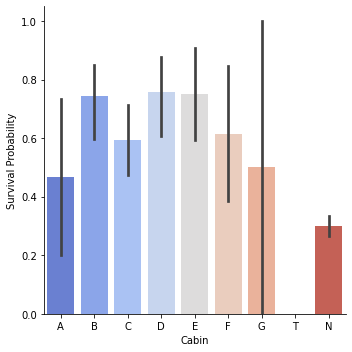

In [26]:
### Correlation between Survival Probability and Cabin
graph = sns.catplot(y='Survived', x='Cabin', data=df, kind='bar', order=['A','B','C','D','E','F','G','T','N'], palette='coolwarm')
graph = graph.set_ylabels('Survival Probability')
plt.show()

In [27]:
#### People without Cabin information - lower Survival Probability
#### People with B,D,E information - higher Survival Probability
df['Cabin'] = df['Cabin'].map({'A':0, 'B':0.1, 'C':0.2, 'D':0.3, 'E':0.4, 'F':0.5, 'G':0.6, 'T':0.7, 'N':0.1})

In [28]:
## Feature Scaling - Age
bins = pd.qcut(df['Age'], 6, precision=2, labels=['A1','A2','A3','A4','A5','A6'])
df['binned_Age'] = bins
df['binned_Age'] = df['binned_Age'].map({'A1':0.0, 'A2':0.2, 'A3':0.4, 'A4':0.6, 'A5':0.8, 'A6':1.0})
df = df.drop('Age', axis=1)

In [32]:
# Train/Test
y = np.array(df['Survived'])
x = df.drop('Survived', axis=1)

def calculate_score(state_list, x, y):
    '''
    Function that returns the mean of train scores and test scores
    by separating the dataset by the number of times(the length of the list)
    when input the list arguments containing the random_state numbers
    '''
    
    train_scores = []
    test_scores = []
    
    for state in state_list:
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=state)
        
        nb = GaussianNB()
        nb.fit(X_train, Y_train)
        
        train_score = nb.score(X_train, Y_train)
        test_score = nb.score(X_test, Y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        print('Mean of train scores', np.mean(train_scores))
        print('Mean of test scores', np.mean(test_scores))
        
        return train_scores, test_scores

train_scores, test_scores = calculate_score(state_list=list(range(0,20)), x=x, y=y)

## Mean of train scores: 0.787765293383271
## Mean of test scores: 0.8
    
## According to this random_state setting and test_size setting,
## the mean of test scores is about 80.17%
## As a result of training by comparing various settings(test_size=0.2, random_state=10~100, etc.),
## it was confirmed that the Naive Bayes single model shows approximately 78-79% performance.

Mean of train scores 0.787765293383271
Mean of test scores 0.8
